# Data Sampling and Distributions

<!-- ## Probability

Sample space - set of possible outcomes

- mutually exclusive
- collectively exhaustive
- right granualarity

**`TO BE DONE`** -->

## Sample

A sample(n) is a subset of data from larger dataset generally called population(N).

## Random Sampling 

- Select Items randomly from population, either with or without replacement(no duplicates: something is selected in sample then probability of that value to be selected again is 0).
- Random choice.
- A process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import animation
from IPython import display
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## selected randomly 

np.random.choice([12,11,56,23,10,5,17,50,30],4,replace=False)

array([ 5, 10, 23, 11])

In [3]:
np.random.choice([12,11,56,23,10,5,17,50,30],4,replace=True)

array([23, 12, 56, 56])

> Data quality in data science involves completeness,
consistency of format, cleanliness, and accuracy of individual data points.
Statistics adds the notion of representativeness

## Sampling Bias

when sample is selected in nonrandom way from a large population.
A sample that misrepresents the population.


### Self Selection Bias 

> In real world lets take movie review or reviews in general. People volunteerly going and giving review to a particular, creates a bias in statistical results. Because the reviewers are not randomly selected, these reviewers are generally who dislikes the item or belong to a group already or generally writes review for every item, selected themselves creating **self selection bias**.

### Statistical Bias
 
> Statisitcal bias refers to sampling error that are produced by sampling process. like gun shooting at a target. conceptually is should generate a random errors(doesn't the target). 

Bias occurs when measurements or observations are systematically in error because they are not
representative of the full population.

**Unbiased data examples**

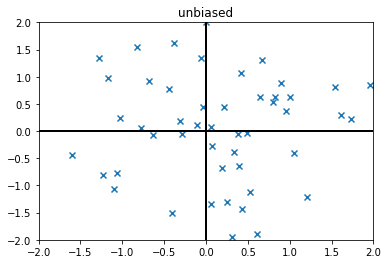

In [4]:
unbiased_data = np.random.normal(scale=1,size=(50,2))

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axhline(0,color='k',lw=2)
plt.axvline(0,color='k',lw=2)
plt.title("unbiased")
plt.scatter(unbiased_data[...,0],unbiased_data[...,1],marker='x')


**Biased data examples**

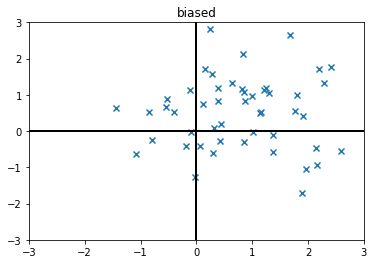

In [5]:
biased_data = np.random.normal(size=(50,2)) + 0.7

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axhline(0,color='k',lw=2)
plt.axvline(0,color='k',lw=2)
plt.title("biased")
plt.scatter(biased_data[...,0],biased_data[...,1],marker='x')

### Selection Bias

> selectively choosing data- consciously or unconsciously, that it leads to misleading conclusion.

## Random Seeding 

- To get random choice generated but has to be generated everytime has to be same for peer checking or to generate same results. Get same randomly generated sequence everytime if seed value is determined.
- **SEED** is a value sets initial state of random number generator.


In [6]:
## It will generate same random number everytime 
np.random.seed(100)
np.random.rand()

0.5434049417909654

## Random Variable

- A set of all possible outcomes of a random experiment is called <b>SAMPLE SPACE</b>
- probability of all outcomes : Probability Distribution
- Random Variable maps to one of the outcomes of the sample space.

## Standerd Error

Standard error explains variability in the sampling distribution.

Standard Error (SE): $\frac{s}{\sqrt{n}}$

$s = \sqrt{\frac{\sum{(x - \bar{x})^2}}{n-1}}$

s = Standard Deviation\
n = Number of Samples

- SE decreases as sample size increases.
$SE \propto \frac{1}{\sqrt{n}}$

- To calculate take a sample from population calculate mean, standard deviation and standard error and repeat with another sample.
    > but this is statistically wasteful. But turns out it is not necessary to create a new sample everytime instead `bootstrap` resampling can be used. It has become a standard way to estimate standard error(doesn't rely on Central limit theorem)
    
    
**Standard deviation calculates variability of individual data point and Standard error measures variability of a sample metric.**

In [7]:
sigma = 10
samples = sigma * np.random.normal(size=100) 


def std_err(x,**kwargs):
    return x.std(**kwargs) / np.sqrt(x.shape[0])

std_err(samples,ddof=1)

1.0714423912793145

## Bootstrap

Drawing additional `samples with replacement` from sample itself(basically resampling) and recalculate the statistics. This procedure is called bootstrap. 

> Bootstrap is replicating the original sample many times creating  a hypothetical population that it just contains information of original sample but larger.

> In practice we dont create replicas of the samples again and again. We just replace observations after each draw from the original sample. in this way probability for each observation to be drawn from the original sample remains same and bootstrap process can choose duplicates also.

### Bootstrap resampling of the mean
1. Draw a sample, put it in record.
1. Replace sample values and repeat it k times.
1. Record the mean of k resampled values.
1. Repeat the process 1-3 n times.
1. now after these n iterations with results
   1. Calculate std dev and this estimates samples mean SE.
   1. produce distribution
   1. find confidence interval

In [8]:
np.random.seed(61231601)
sample_size = 100
sigma = 10
samples = sigma * np.random.normal(size=sample_size) 

In [9]:
std_err(samples,ddof=1)

0.9475540244306867

In [10]:
k = 100
n = 500

resamples = np.random.choice(samples,size=(k,n),replace=True)

resamples.shape, resamples

((100, 500),
 array([[  1.81379872,   1.81379872,   7.6665007 , ...,  -4.79558175,
           6.41084335, -12.59266908],
        [ -8.79617236,   2.67480667,  -8.84956233, ...,   9.72528953,
           6.14659115,  -9.90189598],
        [-11.6105251 ,  10.26199316,  10.26486663, ...,   7.6665007 ,
           0.60544452, -15.83255565],
        ...,
        [  5.83951234,   7.6665007 ,  -2.31220875, ...,  -8.79617236,
         -15.83255565,   5.83951234],
        [ -3.77794243,  15.65287132,  12.31191552, ...,  -3.33820583,
          13.05346981,   4.74494356],
        [ -0.29176448,   1.62285529,   8.36999405, ...,   1.62285529,
          -9.90189598,  -0.22032539]]))

In [11]:
samples.mean(), resamples.mean(axis=1).mean()

(0.36559828947867506, 0.43441337621942355)

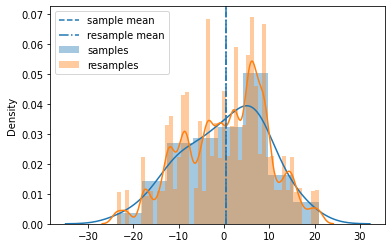

In [12]:
ax = plt.subplot(111)

ax.axvline(samples.mean(), ls='--', label='sample mean')
sns.distplot(samples, label="samples",ax=ax)

sns.distplot(resamples, label="resamples", ax=ax)
ax.axvline(resamples.mean(axis=1).mean(), ls='-.', label="resample mean")

plt.legend()
plt.show()

## Confidence Intervals

**Confidence level** the percentage/ limits of confidence intervals, expected to contain statistic of interest of the population

**Coverage level** How much data it needs to cover.

It is the interval that encloses the central x% of the bootstrap sampling distribution of sample statistic.


$CI = \bar{x} \pm z \frac{s}{\sqrt{n}}$

z = confidence level value

<AxesSubplot:ylabel='Density'>

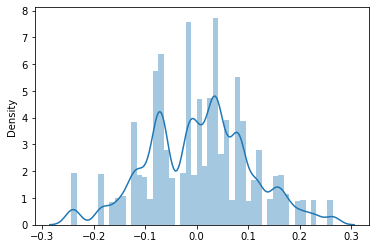

In [13]:
n = 100
samples = np.random.normal(scale=0.1,size=n) 

R = 200
resamples = np.random.choice(samples,size=(k,R),replace=True)

sns.distplot(resamples)

# Probability Distributions 

Discrete Probability Distribution -> Probability Mass Function -> Continuous form -> Probability Density Function

``` 
[ Discrete ] Probability Mass Function 
                (PMF)
                                       \
                                        \
                                         Cumulative Distribution Function
                                       /            (CDF)
                                      /
[ Continuous ] Probability Density Function 
                (PDF)                    
```

**References**

[khanacademy](https://www.youtube.com/user/khanacademy)

[zedstatistics](https://www.youtube.com/c/zedstatistics)


## Understanding pmf and cdf

In [25]:
from scipy import stats

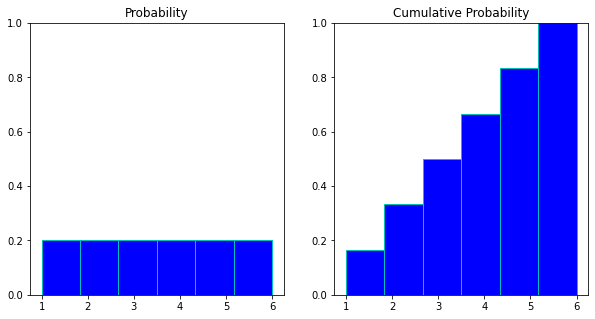

In [95]:
data = np.linspace(start=1,stop=6,num=6,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].hist(data,bins=6,density=True,edgecolor='c',color='b')
ax[0].set_xticks([1,2,3,4,5,6])
ax[0].set_title("Probability")
ax[0].set_ylim([0,1])

ax[1].hist(data,bins=6,density=True,cumulative=True,edgecolor='c',color='b')
ax[1].set_xticks([1,2,3,4,5,6])
ax[1].set_title("Cumulative Probability")
ax[1].set_ylim([0,1])

plt.show()

in above chart - 
- probability chart of rolling a dice and cumulative probability chart of it.
- in probabaility chart every digit has same probability of appearing on the roll of dice, hence all of them are at same height.
- in cumulative prob chart evert digit(x) represents probabilities of digits<=x to appear on the roll.

like at bin 4 in cumul. prb.(rolling anything 4 or less) : p(x<=4) = p(x=1) + p(x=2) + p(x=3) + p(x=4)

## Understanding pdf and cdf

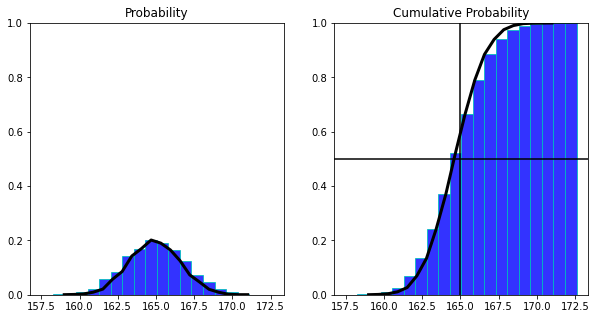

In [125]:
np.random.seed(0)
bins = 20
mu = 165
sigma = 2
data = np.random.normal(loc=mu,scale=sigma,size=5000)
x = np.linspace(mu-sigma*3,mu+sigma*3,bins)

fig,ax = plt.subplots(1,2,figsize=(10,5))

n, _, _ = ax[0].hist(data,density=True,edgecolor='c',color='b',bins=bins,alpha=0.8)
ax[0].plot(x,n,'k',lw=3)
ax[0].set_title("Probability")
ax[0].set_ylim([0,1])

n, _, _ = ax[1].hist(data,density=True,cumulative=True,edgecolor='c',color='b',bins=bins,alpha=0.8)
ax[1].plot(x,n,'k',lw=3)
ax[1].axhline(0.5,c='k')
ax[1].axvline(mu,c='k')

ax[1].set_title("Cumulative Probability")
ax[1].set_ylim([0,1])

plt.show()

| Distribution Type | Examples |
| ----------------- | ----------- |
| Continuous Distribution | Normal(Gaussian) | 
|| Chi-Sqaure | 
|| F |
|| T |
|| Uniform |
| Discrete Distribution | Binomial |
|| Poisson |
|| Exponenetial |
|| Weibull |
|| Hypergeometric |
|| Multinomial | 
|| Negative Binomial |


| scipy function | description |
|-----|------------------------------------|
| pdf | Probability distribution function |
| cdf | Cumulative distribution function |
| sf | Survival function (1 – cdf) |
| rvs | Creating random samples from a distribution.(random variable samples) |
| ppf | percent point function |
| pmf | Probability mass function | 

## Continuous Distribution

### Normal(Gaussian) Distribution

- the normal distribution is by far the most important probability distribution. One of the main reasons for that is the Central Limit Theorem (CLT) 
- area under the curve(AUC) = 1

- say x $\in R$, x is distributed Gaussian with mean $\mu$ , variance $\sigma^2$, standard deviation $\sigma$
    

\begin{align}
    x &\sim N(\mu, \sigma^2) \text{, where}\\
    pdf(x) &= \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)\\
    \mu &= \frac{1}{m}\sum_{i=1}^{m}x^{(i)}\\
    \sigma &=  \frac{1}{m}\sum_{i=1}^{m}(x^{(i)} - \mu)^2
\end{align}

In [14]:
data = np.linspace(start=0, stop=100, num=1000)

In [15]:
from scipy.stats import norm

norm = norm(loc=50, scale=10)
mean,var,skew,kurtosis = norm.stats(moments="mvsk")
std = np.sqrt(var)

print(mean,var,skew,kurtosis)

50.0 100.0 0.0 0.0


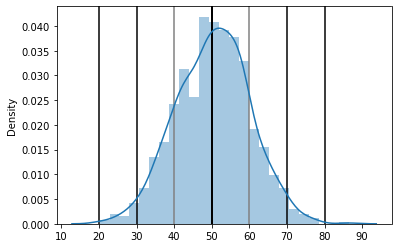

In [16]:
fig,ax = plt.subplots(1,1)
ax.axvline(mean, c='k', lw=2)
ax.axvline(mean-std, c='grey')
ax.axvline(mean+std, c='grey')
ax.axvline(mean-std*2, c='k')
ax.axvline(mean+std*2, c='k')
ax.axvline(mean-std*3, c='k')
ax.axvline(mean+std*3, c='k')
sns.distplot(norm.rvs(1000), kde=True)
plt.show()

- 68% within 1 standard deviation.
- 98% within 2 standard deviation.
- 99.7% within 3 standard deviation.

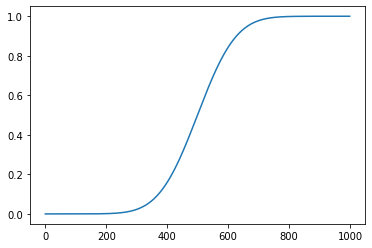

In [17]:
plt.plot(norm.cdf(data))
plt.show()

this one is just to check how rvs works. creating random variable samples.

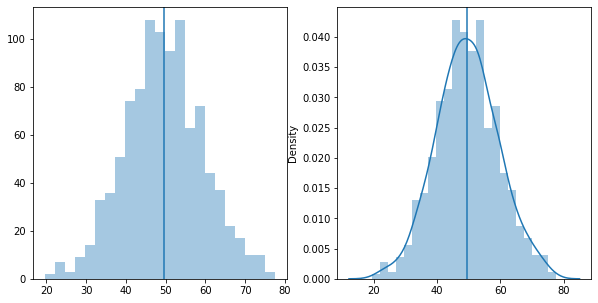

In [18]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
data = norm.rvs(1000,random_state=0)

ax[0].axvline(np.mean(data))
sns.distplot(data,kde=False,ax=ax[0])

ax[1].axvline(np.mean(data))
sns.distplot(data,kde=True,ax=ax[1])
plt.show()

#### Standard normal distriution (z distribution)

- normal distribution with mean = 0 and standard deviation = 1.

<AxesSubplot:ylabel='Density'>

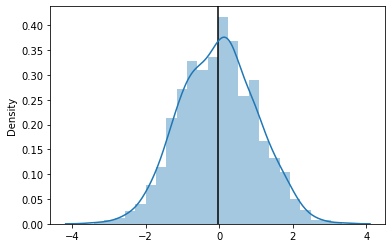

In [19]:
snd = np.random.normal(loc=0,scale=1,size=1000)

plt.axvline(snd.mean(),color='k')
sns.distplot(snd)

#### Coverting to z-scores (Standardization/ Normalization)

Converting data to z-scores(normalizing or standardizing) doesn't convert the data to normal distribution, it just puts the data in the same scale as standard normal distribution. 

- **Normalization Process** subtract mean and devide by the standard deviation. $z = \frac{x - \bar{x}}{\sigma}$

<AxesSubplot:ylabel='Density'>

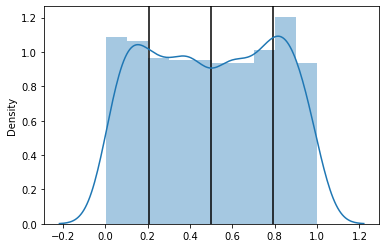

In [20]:
data = np.random.rand(1000)

plt.axvline(data.mean(),color='k')
plt.axvline(data.mean() - data.std(),color='k')
plt.axvline(data.mean() + data.std(),color='k')

sns.distplot(data)

In [21]:
z_scores = (data - data.mean()) / data.std(ddof=1)

z_scores.mean(),z_scores.std(ddof=1)

(-2.540190280342358e-16, 1.0)

<AxesSubplot:ylabel='Density'>

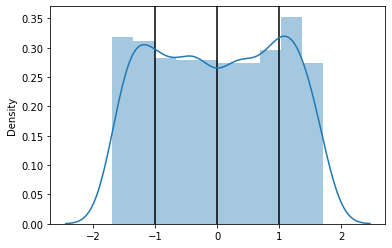

In [22]:
plt.axvline(z_scores.mean(),color='k')
plt.axvline(z_scores.mean() - z_scores.std(),color='k')
plt.axvline(z_scores.mean() + z_scores.std(),color='k')
sns.distplot(z_scores)

#### Method to calculate auc with z-score

Why the hell would I calculate z-score? `TBD`

- !pip install --no-cache-dir git+https://github.com/NishantBaheti/graphpkg

In [23]:
mu = 75
sigma = 10

bell_curve_data = np.random.normal(loc=mu,scale=sigma,size=(10000,))


    Min     :   35.938277226394426 
    Max     :   107.77263085432403 
    Median  :   75.11027540147064 
    Mode    :   ModeResult(mode=array([35.93827723]), count=array([1])) 
    Mean    :   75.12077946155267 
    Std dev :   9.83596182479845   
    


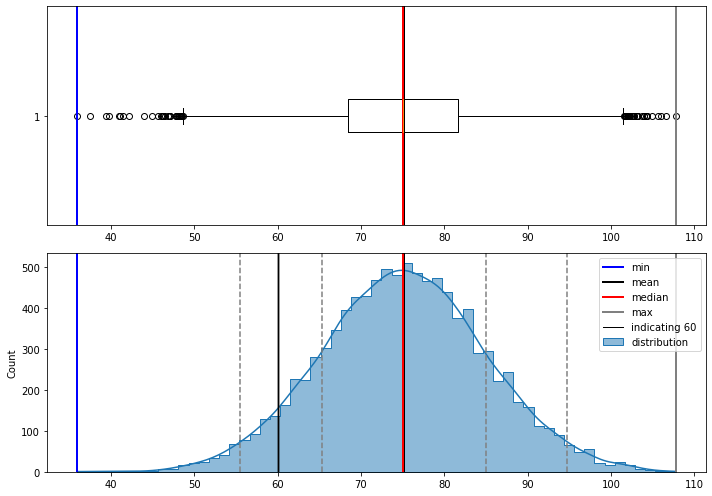

In [24]:
from graphpkg.static.utils import plot_distribution

plot_distribution(bell_curve_data,indicate_data=[60],figsize=(10,7))

- in the curve above i can see. i need to find z-score(area under the curve from left side only) for -1.49.
- so lets look at the z score table

<img src="ZValue.png">

##### z-score table

This table tells us area under the curve(probability in this case) based on z-score.

<img src="NegativeZValues.png"/>



<img src="PositiveZValues.png"/>


- we need negative 1.49
- so from top to bottom i'll select -1.4 
- and from left to right i'll select 0.09
- i get 0.06811


    Min     :   -3.437809283722723 
    Max     :   4.215669652503472 
    Median  :   0.007671124733260572 
    Mode    :   ModeResult(mode=array([-3.43780928]), count=array([1])) 
    Mean    :   0.019678438574379953 
    Std dev :   1.004029300790749   
    


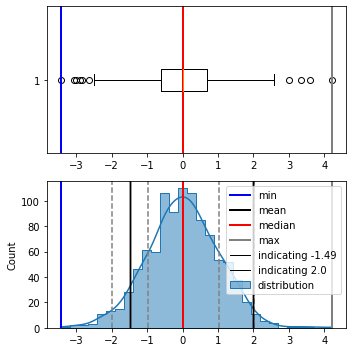

In [25]:
data = np.random.normal(loc=0,scale=1,size=1000)
plot_distribution(data,indicate_data=[-1.49, 2.0])

here in the diagram, area under the curve on the left side from -1.49 is 0.06811(6.8%) and 2.0 is 0.9772(97.72%). and this is correct also as -1.49 doesnt have a lot of data on the left side of it.

In [26]:
from scipy import stats

stats.norm.ppf(0.06811) #percent point function

-1.4900161102718568

In [27]:
stats.norm.ppf(0.9772)

1.9990772149717693

#### Central limit theorem

- The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed (we can use normal distribution statistic).
- simply for a population, increase number of samples then distribution moves towards normal distribution.
- Central limit theorem allows normal-approximation formulas like t-distribution to be used in calculating sampling distributions ofr inference ie confidence intervals and hypothesis tests.

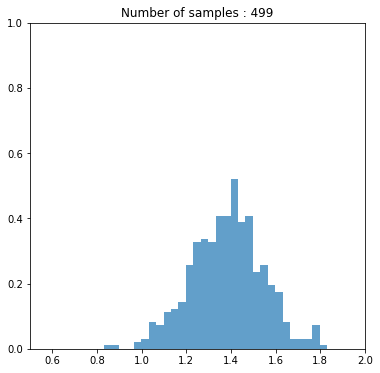

In [28]:
from scipy.stats import norm
bins = 30
sample_size = 500
norm = norm(loc=0, scale=1)
sample_data = norm.rvs(size= sample_size,random_state=10)

fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot()

ax1.set_xlim(0.5, 2)
ax1.set_ylim(0, 1)

_, _, container = ax1.hist(sample_data[:1],bins=bins,density=True,alpha=0.7)

def draw_frame(n):
    heights, _ = np.histogram(sample_data[:n], bins=bins, density=True)
    for height,rect in zip(heights,container.patches):
        rect.set_height(height)
    ax1.set_title(f"Number of samples : {n}")
    return container.patches

anim = animation.FuncAnimation(fig, draw_frame, frames=sample_size, interval=100, blit=True)

display.HTML(anim.to_html5_video())

### Long Tailed Distribution

**Tail** long narrow portion of a frequency dist. extreme values occur at low frequency.

most data is not normally distribution.

### Chi-squared Distribution

- if a random variable $Z$ has standard normal distribution then $Z_1^2$ has the $\chi^2$ distribution with one degree of freedom
- if a random variable $Z$ has standard normal distribution then $Z_1^2 + Z_2^2$ has the $\chi^2$ distribution with two degree of freedom
- if $Z_1,Z_2,...,Z_k$ are independent standard normal (distribution) random variables then $Z_1^2 + Z_2^2 + ... + Z_k^2$ has the $\chi^2$ distribution with k degrees of freedom


All these are actually explained below.

\begin{align}
\text{Probability density function }f(x,k)=
    \begin{cases}
        \frac{1}{2^{(k/2)} \Gamma{(k/2)}} . x^{(k/2) -1}. e^{(-x/2)}  & \text{for } x \ge 0\\
        0 & else
    \end{cases}
\end{align}

Where 

k = degree of freedom


Gamma func $\Gamma(x)=(x-1)!$

#### Detailed intuition

`Can be thought of as the square of selection taken from a standard normal distribution`
Derivation $\chi_k^2 = \sum_{i=1}^k Z_i^2$

##### 1 dof

 $\chi^2 = Z_1^2$

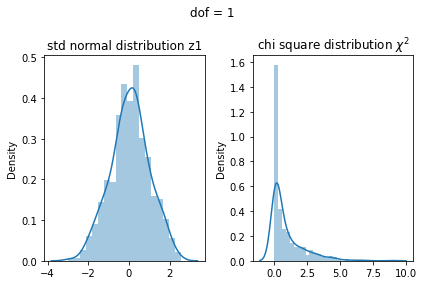

In [29]:
z1 = np.random.normal(size=500)

X1 = z1**2

fig,ax = plt.subplots(1,2)

sns.distplot(z1,ax=ax[0])
ax[0].set_title("std normal distribution z1")

sns.distplot(X1,ax=ax[1])
ax[1].set_title("chi square distribution $\chi^2$")

fig.suptitle("dof = 1")
plt.tight_layout()
plt.show()

##### 2 dof

$\chi^2= Z_1^2 + Z_2^2$ 

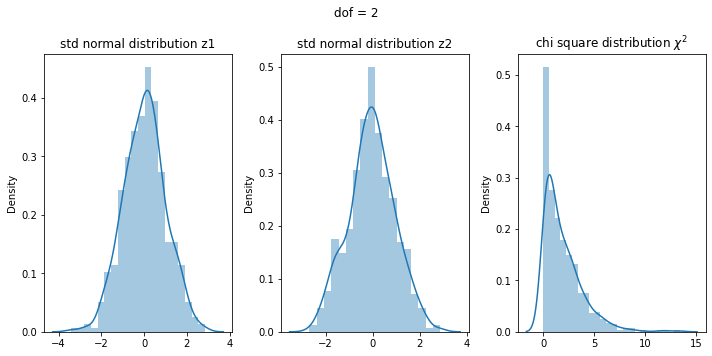

In [30]:
z1 = np.random.normal(size=500)
z2 = np.random.normal(size=500)

X2 = z1**2 + z2**2

fig,ax = plt.subplots(1,3,figsize=(10,5))

sns.distplot(z1,ax=ax[0])
ax[0].set_title("std normal distribution z1")

sns.distplot(z2,ax=ax[1])
ax[1].set_title("std normal distribution z2")


sns.distplot(X2,ax=ax[2])
ax[2].set_title("chi square distribution $\chi^2$")

fig.suptitle("dof = 2")
plt.tight_layout()
plt.show()

##### 3 dof
 $\chi^2 = Z_1^2 + Z_2^2 + Z_3^2$

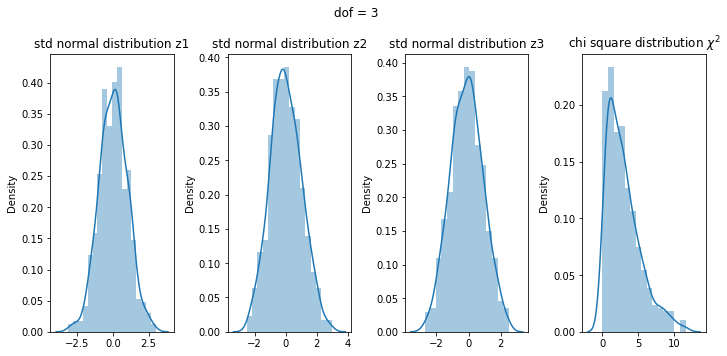

In [31]:
z1 = np.random.normal(size=500)
z2 = np.random.normal(size=500)
z3 = np.random.normal(size=500)


X3 = z1**2 + z2**2 + z3**2

fig,ax = plt.subplots(1,4,figsize=(10,5))

sns.distplot(z1,ax=ax[0])
ax[0].set_title("std normal distribution z1")

sns.distplot(z2,ax=ax[1])
ax[1].set_title("std normal distribution z2")

sns.distplot(z3,ax=ax[2])
ax[2].set_title("std normal distribution z3")


sns.distplot(X3,ax=ax[3])
ax[3].set_title("chi square distribution $\chi^2$")

fig.suptitle("dof = 3")
plt.tight_layout()
plt.show()

##### Comparing all three dof

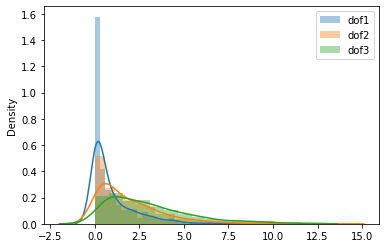

In [32]:
sns.distplot(X1, label='dof1')
sns.distplot(X2, label='dof2')
sns.distplot(X3, label='dof3')

plt.legend()
plt.show()

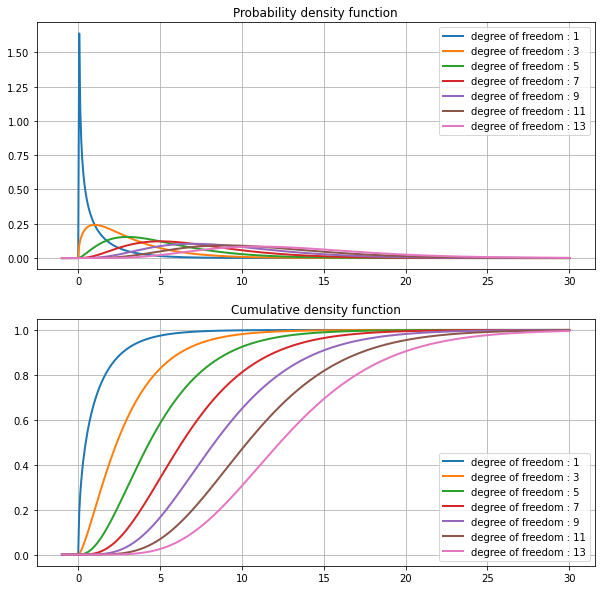

In [33]:
from scipy.stats import chi2

fig,ax = plt.subplots(2,1,figsize=(10,10))
data = np.linspace(start=-1, stop=30, num=500)
for dof in range(1, 15, 2):
    chi2_dist = chi2(dof)
    ax[0].plot(data,chi2_dist.pdf(data),label=f"degree of freedom : {dof}",lw=2)
    ax[1].plot(data,chi2_dist.cdf(data),label=f"degree of freedom : {dof}",lw=2)
    
ax[0].legend(loc="best")
ax[0].grid()
ax[0].set_title("Probability density function")

ax[1].legend(loc="best")
ax[1].grid()
ax[1].set_title("Cumulative density function")

plt.show()

#### Chi-square table

this table includes data point, area under the curve(first row) and degree of freedom(first column).

The areas given across the top are the `areas to the right` of the critical value. To look up an area on the left, subtract it from one, and then look it up (ie: 0.05 on the left is 0.95 on the right)

ref = https://people.richland.edu/james/lecture/m170/tbl-chi.html

<img src="chi-square.png" />

<iframe src='https://people.richland.edu/james/lecture/m170/tbl-chi.html' width="100%" height=500 >Chi Squared Table </iframe>

Ref : https://people.richland.edu/james/lecture/m170/tbl-chi.html

##### degree of freedom 1 

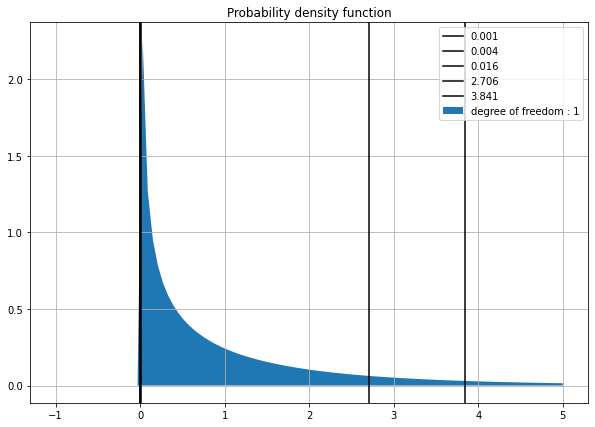

In [34]:

fig,ax = plt.subplots(1,1,figsize=(10,7))
data = np.linspace(start=-1, stop=5, num=100)

dof = 1
chi2_dist = chi2(dof)
ax.fill_between(data,chi2_dist.pdf(data),label=f"degree of freedom : {dof}",lw=2)

for i in [0.001,0.004,0.016,2.706,3.841]:
    ax.axvline(i, c='k', label=i)

ax.legend(loc="best")
ax.grid()
ax.set_title("Probability density function")

plt.show()

from above plot we can see that 
```
0.001   0.004     0.016     2.706     3.841 values are specifying 
0.975     0.95     0.90     0.10       0.05  AUC of the right side of the curve.
(picked values from table above)
```

##### degree of freedom 5

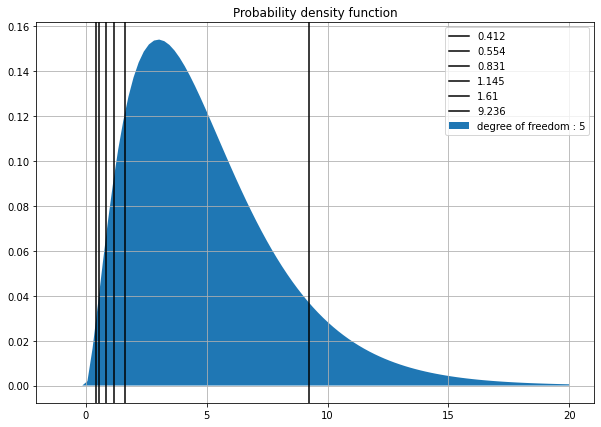

In [35]:

fig,ax = plt.subplots(1,1,figsize=(10,7))
data = np.linspace(start=-1, stop=20, num=100)

dof = 5
chi2_dist = chi2(dof)
ax.fill_between(data,chi2_dist.pdf(data),label=f"degree of freedom : {dof}",lw=2)

for i in [0.412,0.554,0.831,1.145,1.610,9.236]:
    ax.axvline(i, c='k', label=i)

ax.legend(loc="best")
ax.grid()
ax.set_title("Probability density function")

plt.show()

similarly in plot above
```
        values             0.412	0.554	0.831	1.145	1.610	9.236
        AUC(right side)    0.995    0.99    0.975    0.95     0.90    0.10	
```

### Student's t distribition

- Small sample statistics.
- Underlying distribution is normal.
- Unknown population standard normal distribution.
- Sample size too small to apply Central limit theorem.
- Normally shaped distribution but thicker and long tails.
- As degree of freedom increases t distribution tends towards the standard normal distribution.


> Z has standard normal distribution, U has the $\chi^2$ distribution with $\nu$ degree of freedom. Z and U are independent.

\begin{align}
    t &= \frac{Z}{\sqrt{\frac{U}{\nu}}} \text{ has the t distribution with }\nu \text{ degree of freedom}\\
    Z &= \frac{x - \mu}{\sigma}\\
    \\
    \text{ pdf }f(x, \nu) &= \frac{\Gamma (\frac{\nu + 1 }{2})}{\sqrt{\pi \nu} \Gamma (\frac{\nu}{2})}(1+ \frac{x^2}{\nu})^{-\frac{(\nu + 1)}{2}}\\
    \\\nu &= n-1\\
    \\
    \mu &= 0 \text{ for } \nu < 1\\
    \\
    \sigma^2 &= \frac{\nu}{\nu - 2} for {\nu} > 2\\
    \Gamma(x) &= (x-1)! \text{ Gamma Function}
\end{align}

Ref : https://en.wikipedia.org/wiki/Student%27s_t-distribution



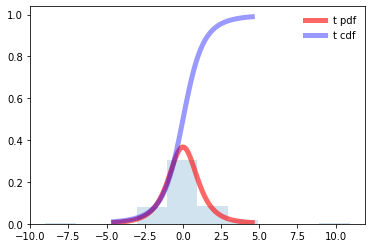

In [36]:
from scipy.stats import t
fig, ax = plt.subplots(1, 1)
df = 3
size = 100
mean, var, skew, kurt = t.stats(df, moments='mvsk')

x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), size)

ax.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t pdf')
ax.plot(x, t.cdf(x, df),'b-', lw=5, alpha=0.4, label='t cdf')

ax.hist( t.rvs(df, size=size), density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

demonstraion on increasing degrees of freedom, t distribution approaches towards normal distribution.
and it seems correct also as by increasing degrees of freedom ($\nu$ = n - 1) we are increasing the sample size also.

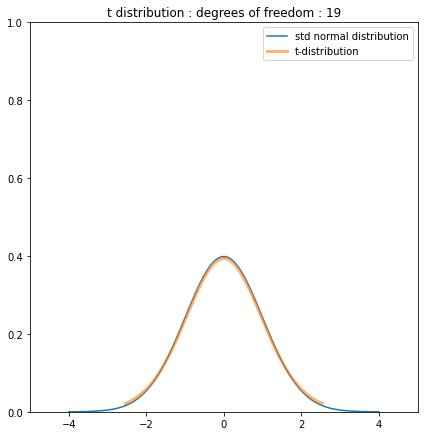

In [66]:
fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot()

ax1.set_xlim(-5, 5)
ax1.set_ylim(0, 1)
d = np.linspace(-4,4,100)

ax1.plot(d,stats.norm.pdf(d),label="std normal distribution")
plot1, = ax1.plot([],[],lw=3, alpha=0.6,label="t-distribution")
plt.legend(loc='best')
plt.tight_layout()
def draw_frame(n):
    
    df = n
    mean, var, skew, kurt = t.stats(df, moments='mvsk')

    x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 1000)
    plot1.set_data(x, t.pdf(x, df))
    ax1.set_title(f"t distribution : degrees of freedom : {n}")
    return (plot1,)

anim = animation.FuncAnimation(fig, draw_frame, frames=20, interval=1000, blit=True)

display.HTML(anim.to_html5_video())

#### t table

t table here shows degrees of freedom and cumulative distribution, probability distribution(one tail, two tails) and gives t-statistic.

<iframe src="https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf" width="100%" height=500>t table</iframe>

<img src='t_table.png' />

Ref : https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

Lets say we need to know what t-statistic with 4 df provides 2.5% in upper tail ? or we need to know the point above which lies 2.5% of the distribution.

the table tells us AUC. so actually we need to find the auc after the 2.5%(0.025) = 1 - 0.025 = 0.975

so either $t_{0.975}$ or one tail 0.025. in table above for df 4 and given inputs then t-statistic = 2.776

or use scipy

In [69]:
stats.t.ppf(0.975,4)

2.7764451051977987

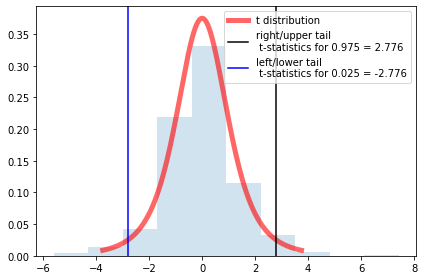

In [108]:
np.random.seed(10)
fig, ax = plt.subplots(1, 1)
df = 4
size = 500
p = 0.025 #2.5%

mean, var, skew, kurt = t.stats(df, moments='mvsk')

x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), size)

ax.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t distribution')
ax.hist(t.rvs(df, size=size), density=True, histtype='stepfilled', alpha=0.2)

right_t_stat = stats.t.ppf(1 - p,df)
left_t_stat = stats.t.ppf(p,df)
ax.axvline(right_t_stat,c='k', label=f'right/upper tail \n t-statistics for {1-p} = {right_t_stat:.3f}')
ax.axvline(left_t_stat,c='b', label=f'left/lower tail \n t-statistics for {p} = {left_t_stat:.3f}')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

because of the symmetry values are same for left and right just the sign is opposite.

`in the center actually it is showing 95% distribution (100 - 2.5 - 2.5)`

### F Distribution

suppose $U_1$ has $\chi^2$ distribution with $df_1$ degrees of freedom \
and $U_2$ has $\chi^2$ distribution with $df_2$ degrees of freedom \
then $F=\frac{\frac{U_1}{df_1}}{\frac{U_2}{df_2}}$ has an F distribution


In [27]:
from scipy.stats import f

dfn, dfd = 29, 18 #degree of fre
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

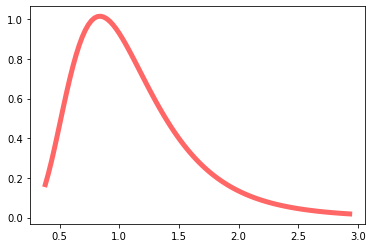

In [28]:
x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)
plt.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

### Uniform Distribution

A continuous random variable X is said to have a Uniform distribution over the interval [a,b], shown as 

\begin{align}
    X &\sim U(a,b) \text{ if its PDF is given by}\\ 
    f(x) &= \begin{cases}
                \frac{1}{b-a} && a \le x \le b\\ 
                0 && \text{ else}\\
            \end{cases}\\ 
    \mu &= \frac{a+b}{2}\\
    \sigma^2 &= \frac{1}{12}{(b-a)^2}
\end{align}

In [31]:
from scipy.stats import uniform

uniform_dist = uniform(loc=50,scale=10)

In [32]:
mean, var, skew, kurt = uniform_dist.stats(moments='mvsk')
mean, var, skew, kurt

(array(55.), array(8.33333333), array(0.), array(-1.2))

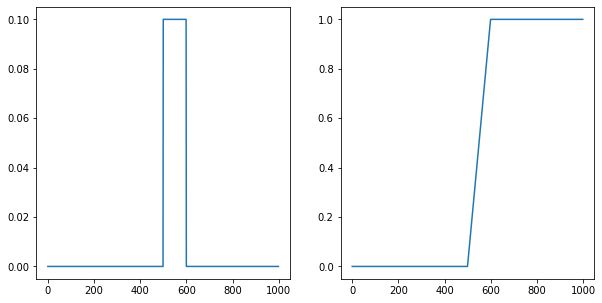

In [33]:
data = np.linspace(start=0, stop=100, num=1000)

fig,ax = plt.subplots(1,2,figsize=(10,5))


ax[0].plot(uniform_dist.pdf(data))

ax[1].plot(uniform_dist.cdf(data))
plt.show()

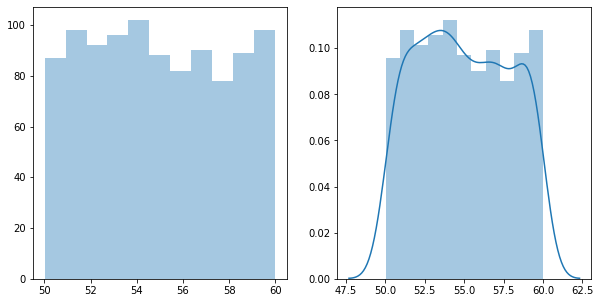

In [34]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(uniform_dist.rvs(1000,random_state=0),kde=False,ax=ax[0])
sns.distplot(uniform_dist.rvs(1000,random_state=0),kde=True,ax=ax[1])
plt.show()

## Discrete Distribution

### Binomial Distribution

**Trial** An event with a discrete outome.\
**Binomial** two outcomes\
**Binomial trial** Trial with two outcomes.(Bernoulli trial)\
**Binomial distribution** Distribution of number of successses in n trials.(Bernoulli distribution)

- n repeated trials
- 2 outcomes only
- probability of success = p
- independent trials

x = number of success results\
n = number of trials\
p = probability of success\
q = (1 - p) failure
        
The frequency distribution of the possible number of successful outcomes in a given number of trials, where the probability of success is same in each of them.

\begin{align}
    b(x;n,p) &= \binom{n}{x}{p^x}{(1-p)}^{(n-x)}\\
    \mu &= np\\
    \sigma^2 &= npq
\end{align}

`It is conventional in statistics to term the “1” outcome the success outcome; it is also common practice to assign “1” to the more rare outcome. Use of the term success does not imply that the outcome is desirable or beneficial, but it does tend to indicate the outcome
of interest.`

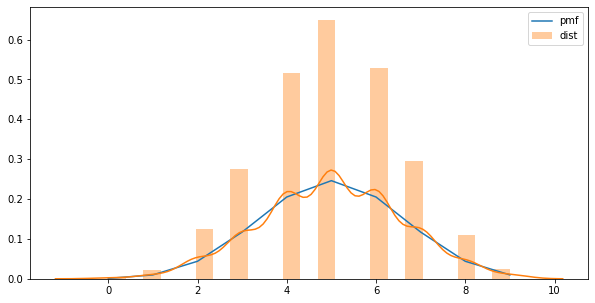

In [35]:
from scipy.stats import binom
## n and p as shape parameters 
n,p = 10, 0.5 # number of trials 10 and 0.2 success rate(single success)
binom_dist = binom(n=n, p =p)
data = range(n)
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(binom_dist.pmf(data), label='pmf')
sns.distplot(binom_dist.rvs(1000,random_state=1), label="dist")
plt.legend()
plt.show()

but for a large data set(big n) p is neither close to 0 or 1. the binomial distribution can be approximated by normal distribution. see below.

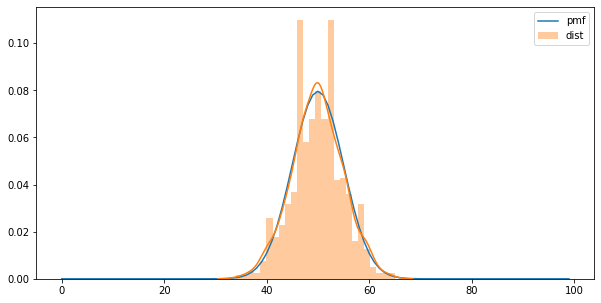

In [36]:
n,p = 100, 0.5 # number of trials 10 and 0.2 success rate(single success)
binom_dist = binom(n=n, p =p)
data = range(n)
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(binom_dist.pmf(data), label='pmf')
sns.distplot(binom_dist.rvs(1000,random_state=1), label="dist")
plt.legend()
plt.show()

### Poisson Distribution

- Results -> success/fail 
- Average number of successes($\mu$) that occurs in a specified region is known

$f(x;\mu) = \exp(-\mu) \frac{\mu^x}{x!}$

e = 2.718 \
$\mu$ = mean number of successes \
x = actual number of successes

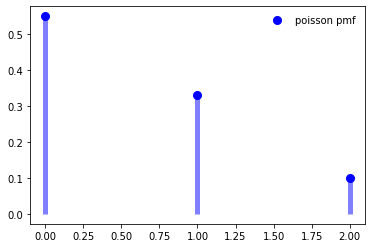

In [37]:
from scipy.stats import poisson

fig, ax = plt.subplots(1, 1)

mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(poisson.ppf(0.01, mu),poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

ax.legend(loc='best', frameon=False)
plt.show()

### Exponential Distribution

### Weibull Distribution
